In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("/home/bhavye/Desktop/data/analysis/datasets/accidental-deaths-in-usa-monthly.csv")
df.head()

,Month,"Accidental deaths in USA: monthly, 1973 ? 1978"
0,1973-01,9007
1,1973-02,8106
2,1973-03,8928
3,1973-04,9137
4,1973-05,10017


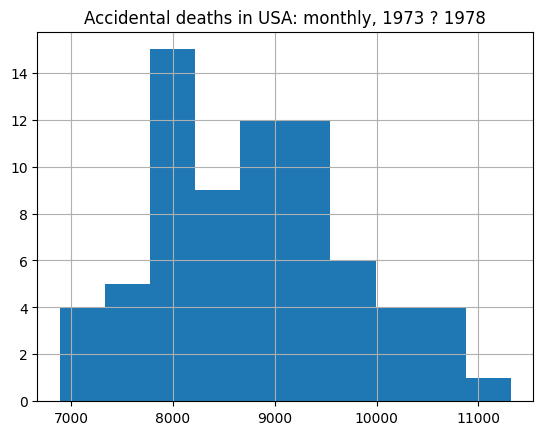

In [3]:
df.hist();

In [4]:
df.shape

(72, 2)

In [5]:
df.describe()

,"Accidental deaths in USA: monthly, 1973 ? 1978"
count,72.000000
mean,8787.736111
std,958.338013
min,6892.000000
25%,8089.000000
50%,8728.500000
75%,9323.250000
max,11317.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Month                                           72 non-null     object
 1   Accidental deaths in USA: monthly, 1973 ? 1978  72 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


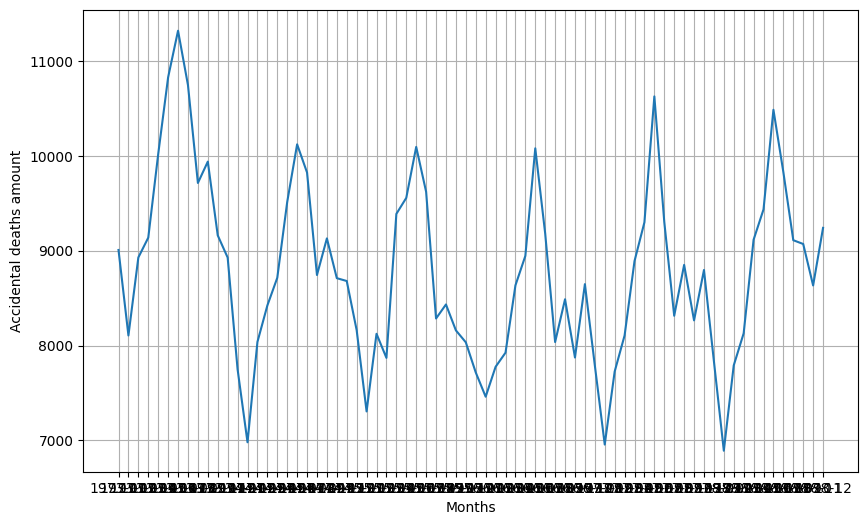

In [7]:
plt.figure(figsize=(10,6))
plt.xlabel("Months")
plt.ylabel("Accidental deaths amount")
plt.grid()
plt.plot(df['Month'],df['Accidental deaths in USA: monthly, 1973 ? 1978'])

In [8]:
years = []
particular_month = []
for i in df['Month']:
    year,month = int(i.split("-")[0]),int(i.split("-")[1])
    years.append(year)
    particular_month.append(month)
df['Year'] = years
df['particular_month'] = particular_month

In [9]:
df.head()

,Month,"Accidental deaths in USA: monthly, 1973 ? 1978",Year,particular_month
0,1973-01,9007,1973,1
1,1973-02,8106,1973,2
2,1973-03,8928,1973,3
3,1973-04,9137,1973,4
4,1973-05,10017,1973,5


In [10]:
df.drop("Month",axis=1,inplace=True)
df.columns
df.columns = ['Accidental Deaths','Year','particular_month']

In [11]:
df.head()

,Accidental Deaths,Year,particular_month
0,9007,1973,1
1,8106,1973,2
2,8928,1973,3
3,9137,1973,4
4,10017,1973,5


In [12]:
max_death_year = 0
max_death = 0
for i in range(len(df['Accidental Deaths'])):
    if (df['Accidental Deaths'][i]>max_death):
        max_death = df['Accidental Deaths'][i]
        max_death_year = df['Year'][i]
print(f"Maximum death in {max_death_year} : deaths - {max_death}")

Maximum death in 1973 : deaths - 11317


In [13]:
df.sort_values(by=['Accidental Deaths'],ascending=False,inplace=True)

In [14]:
df.head()

,Accidental Deaths,Year,particular_month
6,11317,1973,7
5,10826,1973,6
7,10744,1973,8
54,10625,1977,7
66,10484,1978,7


In [15]:
df.reset_index(inplace=True)

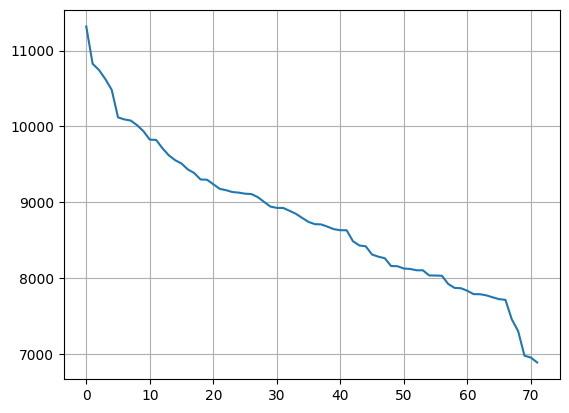

In [16]:
plt.grid()
plt.plot(df.index,df['Accidental Deaths'])

In [17]:
#Maximum Deaths
df[df['Accidental Deaths']>=1e4]

,index,Accidental Deaths,Year,particular_month
0,6,11317,1973,7
1,5,10826,1973,6
2,7,10744,1973,8
3,54,10625,1977,7
4,66,10484,1978,7
5,18,10120,1974,7
6,30,10093,1975,7
7,42,10078,1976,7
8,4,10017,1973,5


In [18]:
#Minimum Deaths
df[df['Accidental Deaths']<=7000]

,index,Accidental Deaths,Year,particular_month
69,13,6981,1974,2
70,49,6957,1977,2
71,61,6892,1978,2


In [19]:
#Average_deaths
filtered_indexes = np.where((df['Accidental Deaths']<1e4) & (df['Accidental Deaths']>7000))
print(df.loc[filtered_indexes].shape)
print(f"median accidental deaths - {np.median(df['Accidental Deaths'])}")
df.loc[filtered_indexes].head()

(60, 4)
median accidental deaths - 8728.5


,index,Accidental Deaths,Year,particular_month
9,9,9938,1973,10
10,67,9827,1978,8
11,19,9823,1974,8
12,8,9713,1973,9
13,31,9620,1975,8


In [24]:
df['Year'].value_counts()
year1973 = df.loc[df['Year']==1973]
year1974 = df.loc[df['Year']==1974]
year1975 = df.loc[df['Year']==1975]
year1976 = df.loc[df['Year']==1976]
year1977 = df.loc[df['Year']==1977]
year1978 = df.loc[df['Year']==1978]

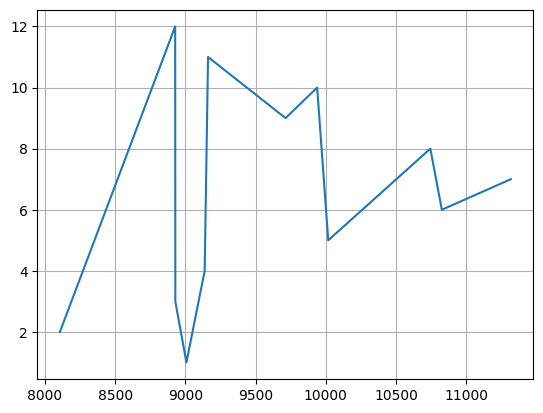

In [48]:
plt.grid()
plt.plot(year1973['Accidental Deaths'],year1973['particular_month'])

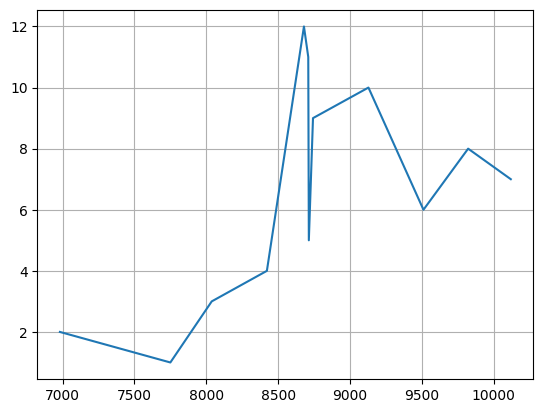

In [47]:
plt.grid()
plt.plot(year1974['Accidental Deaths'],year1974['particular_month'])

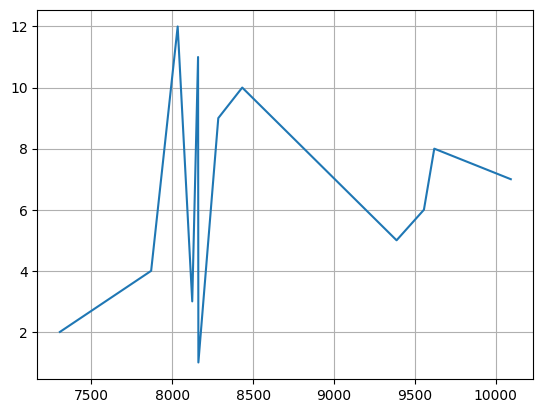

In [46]:
plt.grid()
plt.plot(year1975['Accidental Deaths'],year1975['particular_month'])

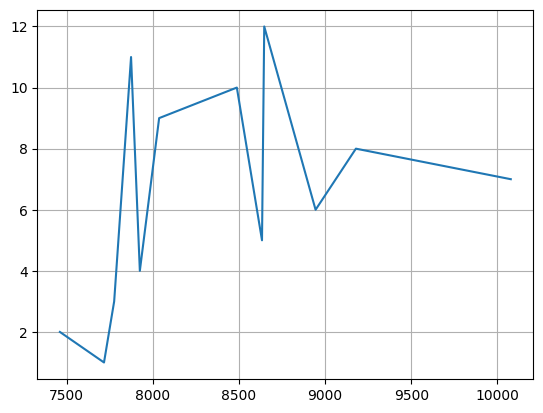

In [45]:
plt.grid()
plt.plot(year1976['Accidental Deaths'],year1976['particular_month'])

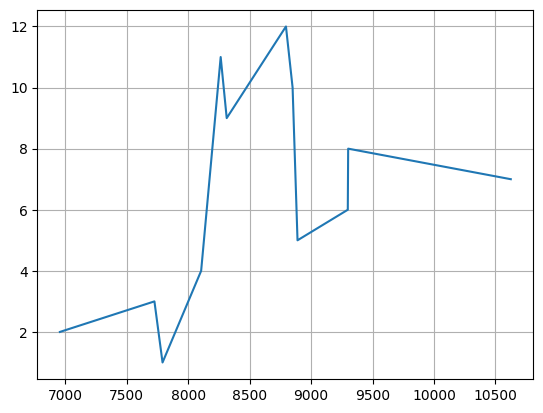

In [44]:
plt.grid()
plt.plot(year1977['Accidental Deaths'],year1977['particular_month'])

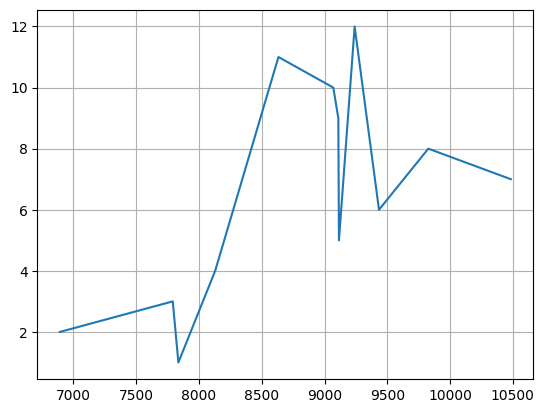

In [40]:
plt.grid()
plt.plot(year1978['Accidental Deaths'],year1978['particular_month'])

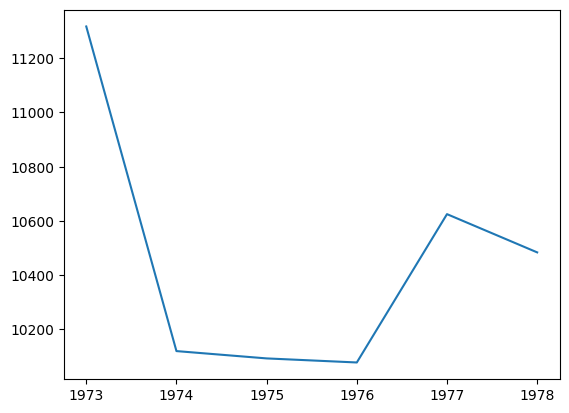

In [58]:
# year1978.head()
max_death_per_year = []
max_death_per_year.append(max(year1973['Accidental Deaths']))
max_death_per_year.append(max(year1974['Accidental Deaths']))
max_death_per_year.append(max(year1975['Accidental Deaths']))
max_death_per_year.append(max(year1976['Accidental Deaths']))
max_death_per_year.append(max(year1977['Accidental Deaths']))
max_death_per_year.append(max(year1978['Accidental Deaths']))
years = pd.Series(years)
years = years.unique()
years = np.array(years)
max_death_per_year = np.array(max_death_per_year)
plt.plot(years,max_death_per_year)

as year increases the accidental deaths first decrease then increases